# Анализ продаж и оценок компьютерных игр для планирования рекламных компаний в магазине «Стримчик»

## Описание проекта

## Описание входных данных

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

## Используемые библиотеки

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mode
from matplotlib.lines import Line2D

sns.set_style("darkgrid")
warnings.filterwarnings("ignore") 

## Загрузка данных и анализ общей информации

In [2]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# приведем названия в нижний регистр
cols = data.columns.str.lower()
data.columns = cols

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Скорректируем тип данных в факторе `user_score` предварительно заменив tbd (подлежит уточнению) на пустые значения, поскольку конкретный пользовательский рейтинг получен не был

In [6]:
data['user_score'] = data['user_score'].apply(lambda x: np.nan if x=='tbd' else x).astype('float64')

In [7]:
data.describe(include='all')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,NaN,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,NaN


В данном разделе можно оценить общие сведения о данных: сколько факторов описывает данные и насколько эти факторы полные и сколько всего игр представлено. Отметим, что всего 16715 позиций игр в нашем датасете, которые описаны с помощью 11 факторов. Данные представлены с 2008 по 2016 год.

*2016 год может быть неполный

## Предобработка данных
### Обработка пропущенных значений

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Пройдемся по всем факторам, в которых есть пропуски, но особое внимание стоит обратить на факторы-оценки игр - в них больше всего пропусков. 

#### `name` — название игры и `genre` — жанр игры

In [9]:
data[pd.isna(data['name'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Два пропуска в названии игры и в жанре относятся к одним и тем же играм. Просто удалим их. Вероятно данные пропуски возникли в результате человеческого фактора.

In [10]:
data = data.dropna(subset=['name'])

In [11]:
# удалим лишние пробелы в начале и конце строки в названии
data['name'] = data['name'].str.strip()

#### `year_of_release` — год выпуска

Пропущенные значения в данном признаке заполним медианным значением, группируя по платформе, на которую игра была выпущена. Данный вариант группировки достаточно хорошо подходит для заполнения года выпуска игры, поскольку определенные игровые платформы выходили в определенные временные периоды, и именно в эти периоды на них выпускалось большинство игр.

In [12]:
platforms = data['platform'].unique()
# произведем замену
for platform in platforms:
    data.loc[(data['platform'] == platform) & (data['year_of_release'].isna()), 'year_of_release'] = \
    data.loc[(data['platform'] == platform), 'year_of_release'].median()
    
# скорректируем тип данных
data['year_of_release'] = data['year_of_release'].astype('int64')

#### Факторы-оценки игр

* `critic_score` - оценка критиков (максимум 100)
* `user_score` — оценка пользователей (максимум 10)
* `rating` — рейтинг от организации ESRB

In [13]:
rating_factors = ['critic_score', 'user_score', 'rating']

for factor in rating_factors:
    value = len(data[pd.isna(data[factor])])/len(data)
    print(f'Процент пропущенных значений фактора {factor}: {value:.2%}')

Процент пропущенных значений фактора critic_score: 51.31%
Процент пропущенных значений фактора user_score: 54.59%
Процент пропущенных значений фактора rating: 40.47%


Пропуски в данном столбце обусловлены тем, что игре либо не были поставлены оценки (возможно слишком маленький тираж продаж), либо их еще не успели опубликовать на ресурсе, с которого был получен данный датасет. 

Попробуем посмотреть какие оценки ставили играм на других платформах, возможно есть ситуации, когда, например для игры на плафторме Wii нет оценки, в то время как эта же игра оценена на других платформах. Таким образом, сможем заполнить часть пропусков медианой группируя по названиям игр.

In [14]:
# сохраним сводную таблицу, чтобы взять из нее медианные значения
games_by_name = data.pivot_table(index=['name'],
                                  values=['critic_score', 'user_score'],
                                  aggfunc='median').reset_index()

# добавим столбцы с медианными значениями по играм
data = data.merge(games_by_name[['name', 'critic_score']], on=['name'], how='left', suffixes=('', '_median'))
data = data.merge(games_by_name[['name', 'user_score']], on=['name'], how='left', suffixes=('', '_median'))

# заполним пропуски на основании медианных значений по названию игр

data['critic_score'] = data['critic_score'].fillna(data['critic_score_median'])
data['user_score'] = data['user_score'].fillna(data['user_score_median'])

# удалим дополнительные колонки
data = data.drop(columns=['critic_score_median', 'user_score_median'])

In [15]:
for factor in rating_factors:
    value = len(data[pd.isna(data[factor])])/len(data)
    print(f'Процент пропущенных значений фактора {factor}: {value:.2%}')

Процент пропущенных значений фактора critic_score: 45.56%
Процент пропущенных значений фактора user_score: 48.01%
Процент пропущенных значений фактора rating: 40.47%


Удалось немного снизить процент пропущенных значений в столбцах `critic_score` (51.31% -> 45.56%) и `user_score` (54.59% -> 48.01%). Остальные пропуски сохраним, поскольку нет других способов их более менее достоверно заполнить.

### Дубликаты

In [16]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют

## Генерация признаков

In [17]:
# посчитаем суммарные продажи
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [18]:
rating_classification = {'E': 'Для всех',
                         'M': 'Для взрослых',
                         'T': 'Подросткам',
                         'E10+': 'Для всех от 10 лет',
                         'K-A': 'Для всех',
                         'AO': 'Для взрослых',
                         'EC': 'Для детей младшего возраста',
                         'RP': np.nan,
                         'RP 17+': 'Рейтинг ожидается - примерно 17+'}

# создадим столбец с расшифрованным рейтингом
data['rating_info'] = data['rating'].apply(lambda x: rating_classification[x] if x is not np.nan else x)
data['rating_info'].value_counts()

Для всех                       3993
Подросткам                     2961
Для взрослых                   1564
Для всех от 10 лет             1420
Для детей младшего возраста       8
Name: rating_info, dtype: int64

##  Исследовательский анализ данных
### Анализ факторов
####  `year_of_release` — год выпуска

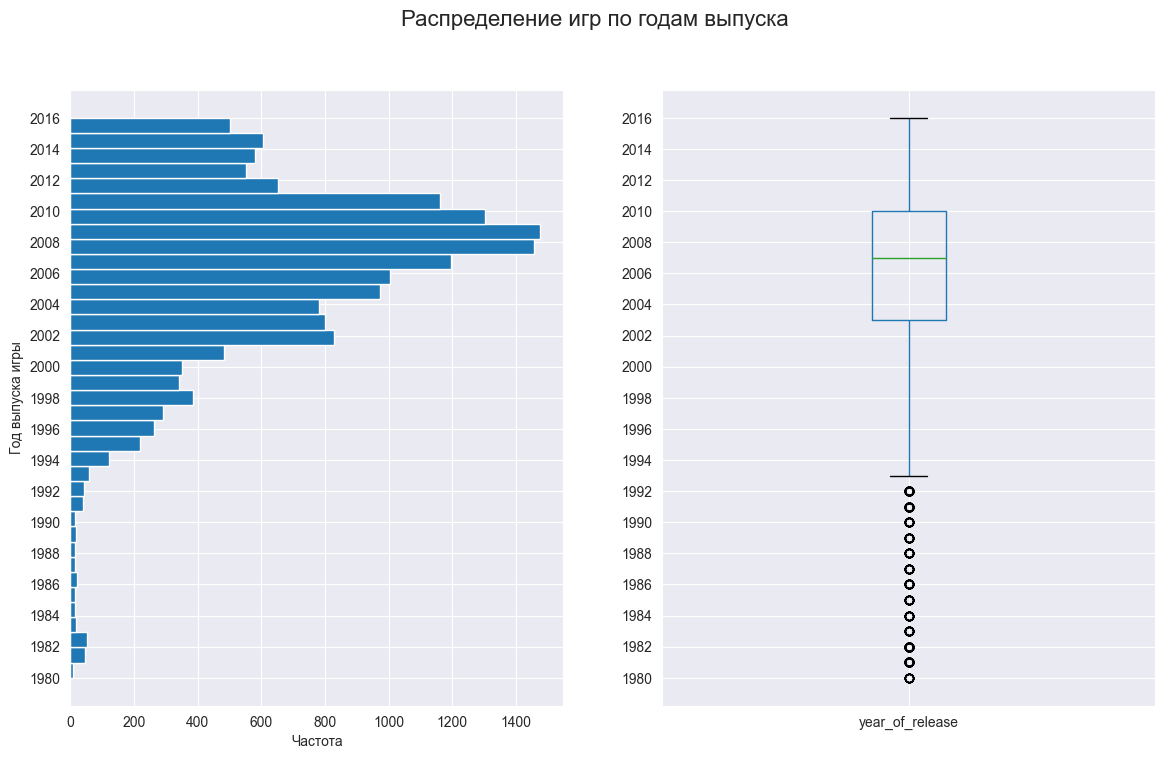

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

data['year_of_release'].plot(kind='hist', bins=37, orientation='horizontal', ax=axes[0])
data.boxplot(['year_of_release'], ax=axes[1])

axes[0].set_ylabel('Год выпуска игры')
axes[0].set_xlabel('Частота')

ticks = np.arange(data['year_of_release'].min(),
                     data['year_of_release'].max()+2,
                     2)
axes[0].set_yticks(ticks)
axes[1].set_yticks(ticks)
fig.suptitle('Распределение игр по годам выпуска', fontsize=16)

plt.show()

На боксплоте видно, что 50% всех позиций находится в диапазоне с 2003 по 2010 годы, а игры, которые выходили раньше 1993 года определяются как выбросы. Это поможет нам сформировать выборку для прогнозирования цены на 2017 год и далее, а пока посмотрим как менялись продажи в зависимости от платформы, на которую игра выпускалась.

#### `platform` и `total_sales`  — платформа и суммарные продажи

Для того, чтобы определить **актуальный период** для прогнозирования продаж на 2017 посмотрим как менялись продажи игр по разным игровым платформам и определим какой "срок жизни" такой платформы в среднем. Рассматривать будем 10 платформ, на которые выпускалось большинство игр с 1993 года.

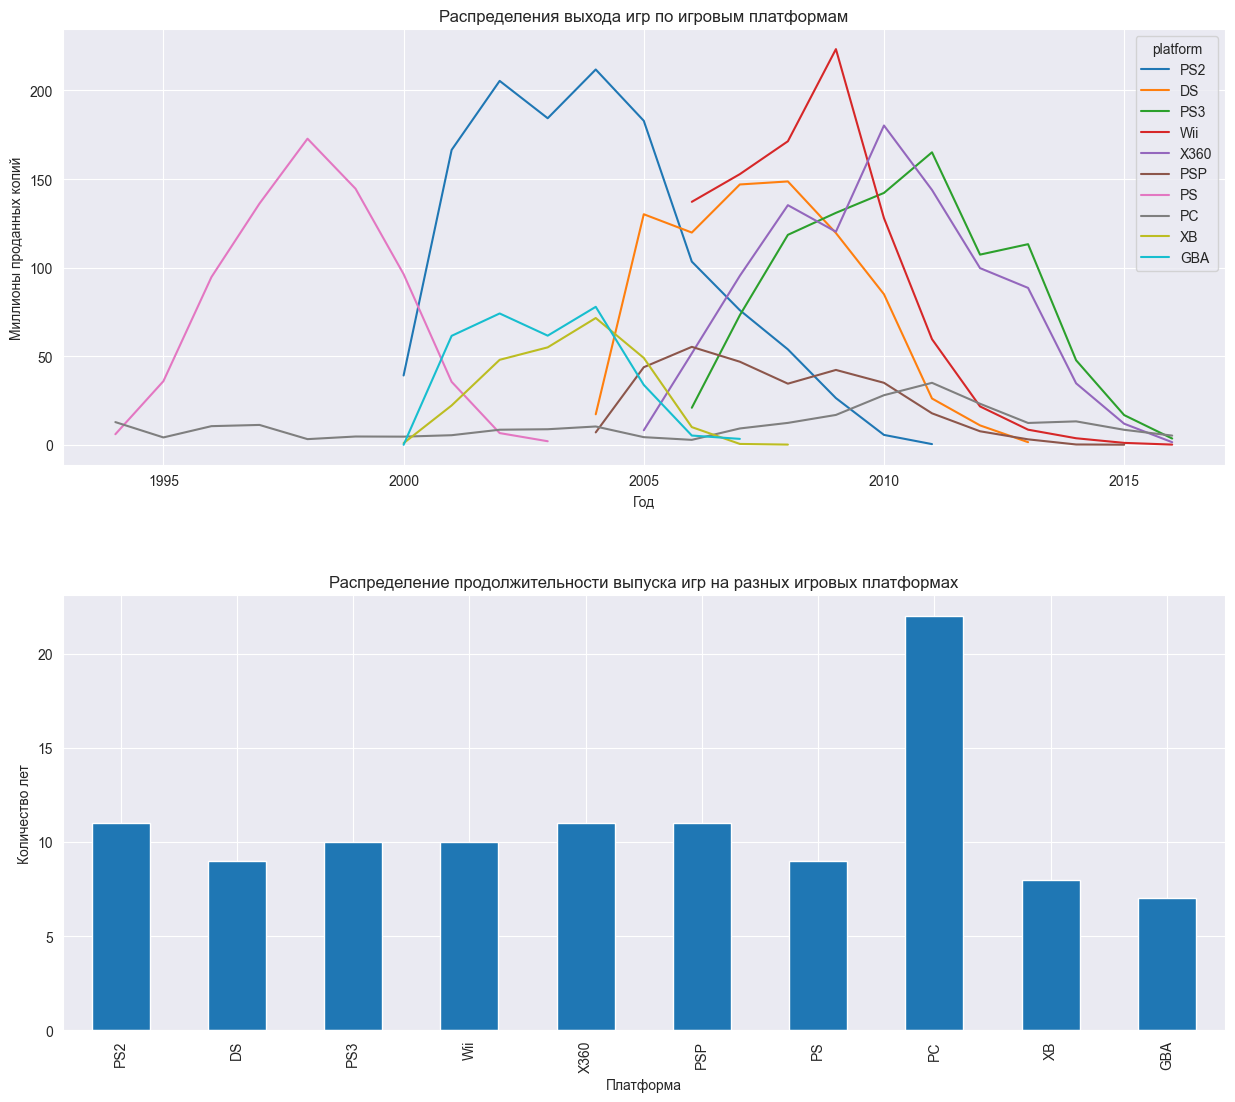

In [20]:
# определим данные с 1993 года в отдельную переменную
data_since_1993 = data[data['year_of_release']>=1993]

# выделим топ10 платформ по количеству игр
top10_platforms = data_since_1993['platform'].value_counts()[:10].index.tolist()

fig, axes = plt.subplots(2, 1, figsize=(15, 13))

data_since_1993.pivot_table(index=['year_of_release'],
                 columns=['platform'],
                 values='total_sales',
                 aggfunc='sum')[top10_platforms].plot(ax=axes[0])

#посчитаем дельту между первым и последним годом выпуска игры по платформам
platform_lifetime = data_since_1993.pivot_table(
    index=['platform'],values='year_of_release',
    aggfunc= lambda x: np.max(x)-np.min(x)).reset_index()
platform_lifetime.set_index('platform').loc[top10_platforms].plot(kind='bar', ax=axes[1])

# очистим переменную
del data_since_1993

axes[0].set_title('Распределения выхода игр по игровым платформам', fontsize=12)
axes[0].set_xlabel('Год')
axes[0].set_ylabel('Миллионы проданных копий')

axes[1].set_title('Распределение продолжительности выпуска игр на разных игровых платформах', fontsize=12)
axes[1].set_xlabel('Платформа')
axes[1].set_ylabel('Количество лет')

axes[1].legend().remove()
plt.subplots_adjust(hspace=0.3)
plt.show()


На графиках представлены данные начиная с 1993 года - минимальный год из анализа `year_of_release` на боксплоте. 

На графике №1 видно как продавались игры по 10 наиболее популярным игровым платформам. Обратим внимание, что с 2009-2010 начинается падение продаж и к 2016 году приближается к 0. Это связано с тем, что игры продавались недостаточное количество времени и вероятно, что лет через 5 статистика выравняется. 

На графике №2 представлено среднее ***время жизни*** **\*** поколений игровых платформ, которое составляет около 7-11 лет. Явным фаворитом является PC и это неудивительно, ведь аббревиатура платформы 'PC' существовала с момента как придумали персональные компьютеры и игры на PC выпускаются с начала его сущестования по наши дни. 

Определим актуальный период, на основе которого можно будет построить прогноз продаж магазина "Стримчик". С учетом того, что в среднем поколение игровой приставки "живет" 7-11 лет, а данные ограничиваются 2016 годом - обозначим **актуальный период** с 2010 по 2016 гг.

\****время жизни*** рассчитывается как разница между самым поздним годом, в котором выпустили игру на конкретную платформу и самым ранним

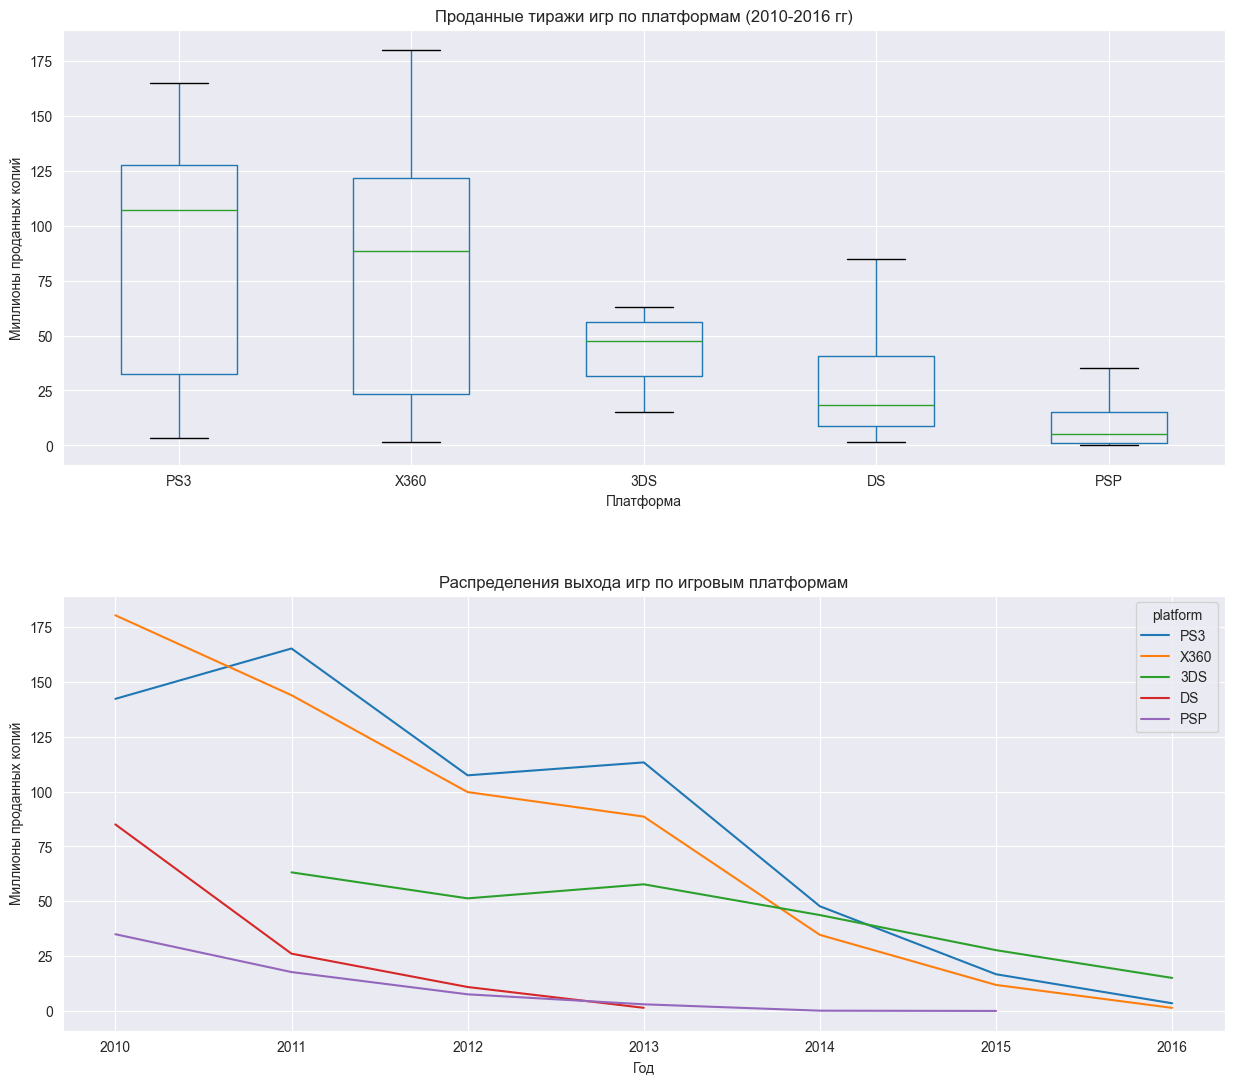

In [21]:
data = data[data['year_of_release']>=2010]

# определим новый топ платформ уже для актуального периода
top10_platforms = data['platform'].value_counts()[:5].index.tolist()

fig, axes = plt.subplots(2, 1, figsize=(15, 13))

data.pivot_table(index=['year_of_release'],
                 columns=['platform'],
                 values='total_sales',
                 aggfunc='sum')[top10_platforms].boxplot(ax=axes[0])


data.pivot_table(index=['year_of_release'],
                 columns=['platform'],
                 values='total_sales',
                 aggfunc='sum')[top10_platforms].plot(ax=axes[1])

axes[0].set_title('Проданные тиражи игр по платформам (2010-2016 гг)', fontsize=12)
axes[0].set_xlabel('Платформа')
axes[0].set_ylabel('Миллионы проданных копий')

axes[1].set_title('Распределения выхода игр по игровым платформам', fontsize=12)
axes[1].set_xlabel('Год')
axes[1].set_ylabel('Миллионы проданных копий')

plt.subplots_adjust(hspace=0.3)

plt.show()

С помощью боксплотов можем оценить, что наибольшие продажи соответствуют платформам таких компаний, как Sony(PS4, PS3, PS2, PSP, PSV), Nintendo(Wii, DS, 3DS), Microsoft (X360, XOne). Обратим внимание, что в новом разрезе данных добавились такие консоли, как PS4 и XOne. Продажи игр по ним сопоставимы с этими же консолями предыдущих версий, то предполагаем, что игры на данные консоли в 2017 будут максимально актуальны.

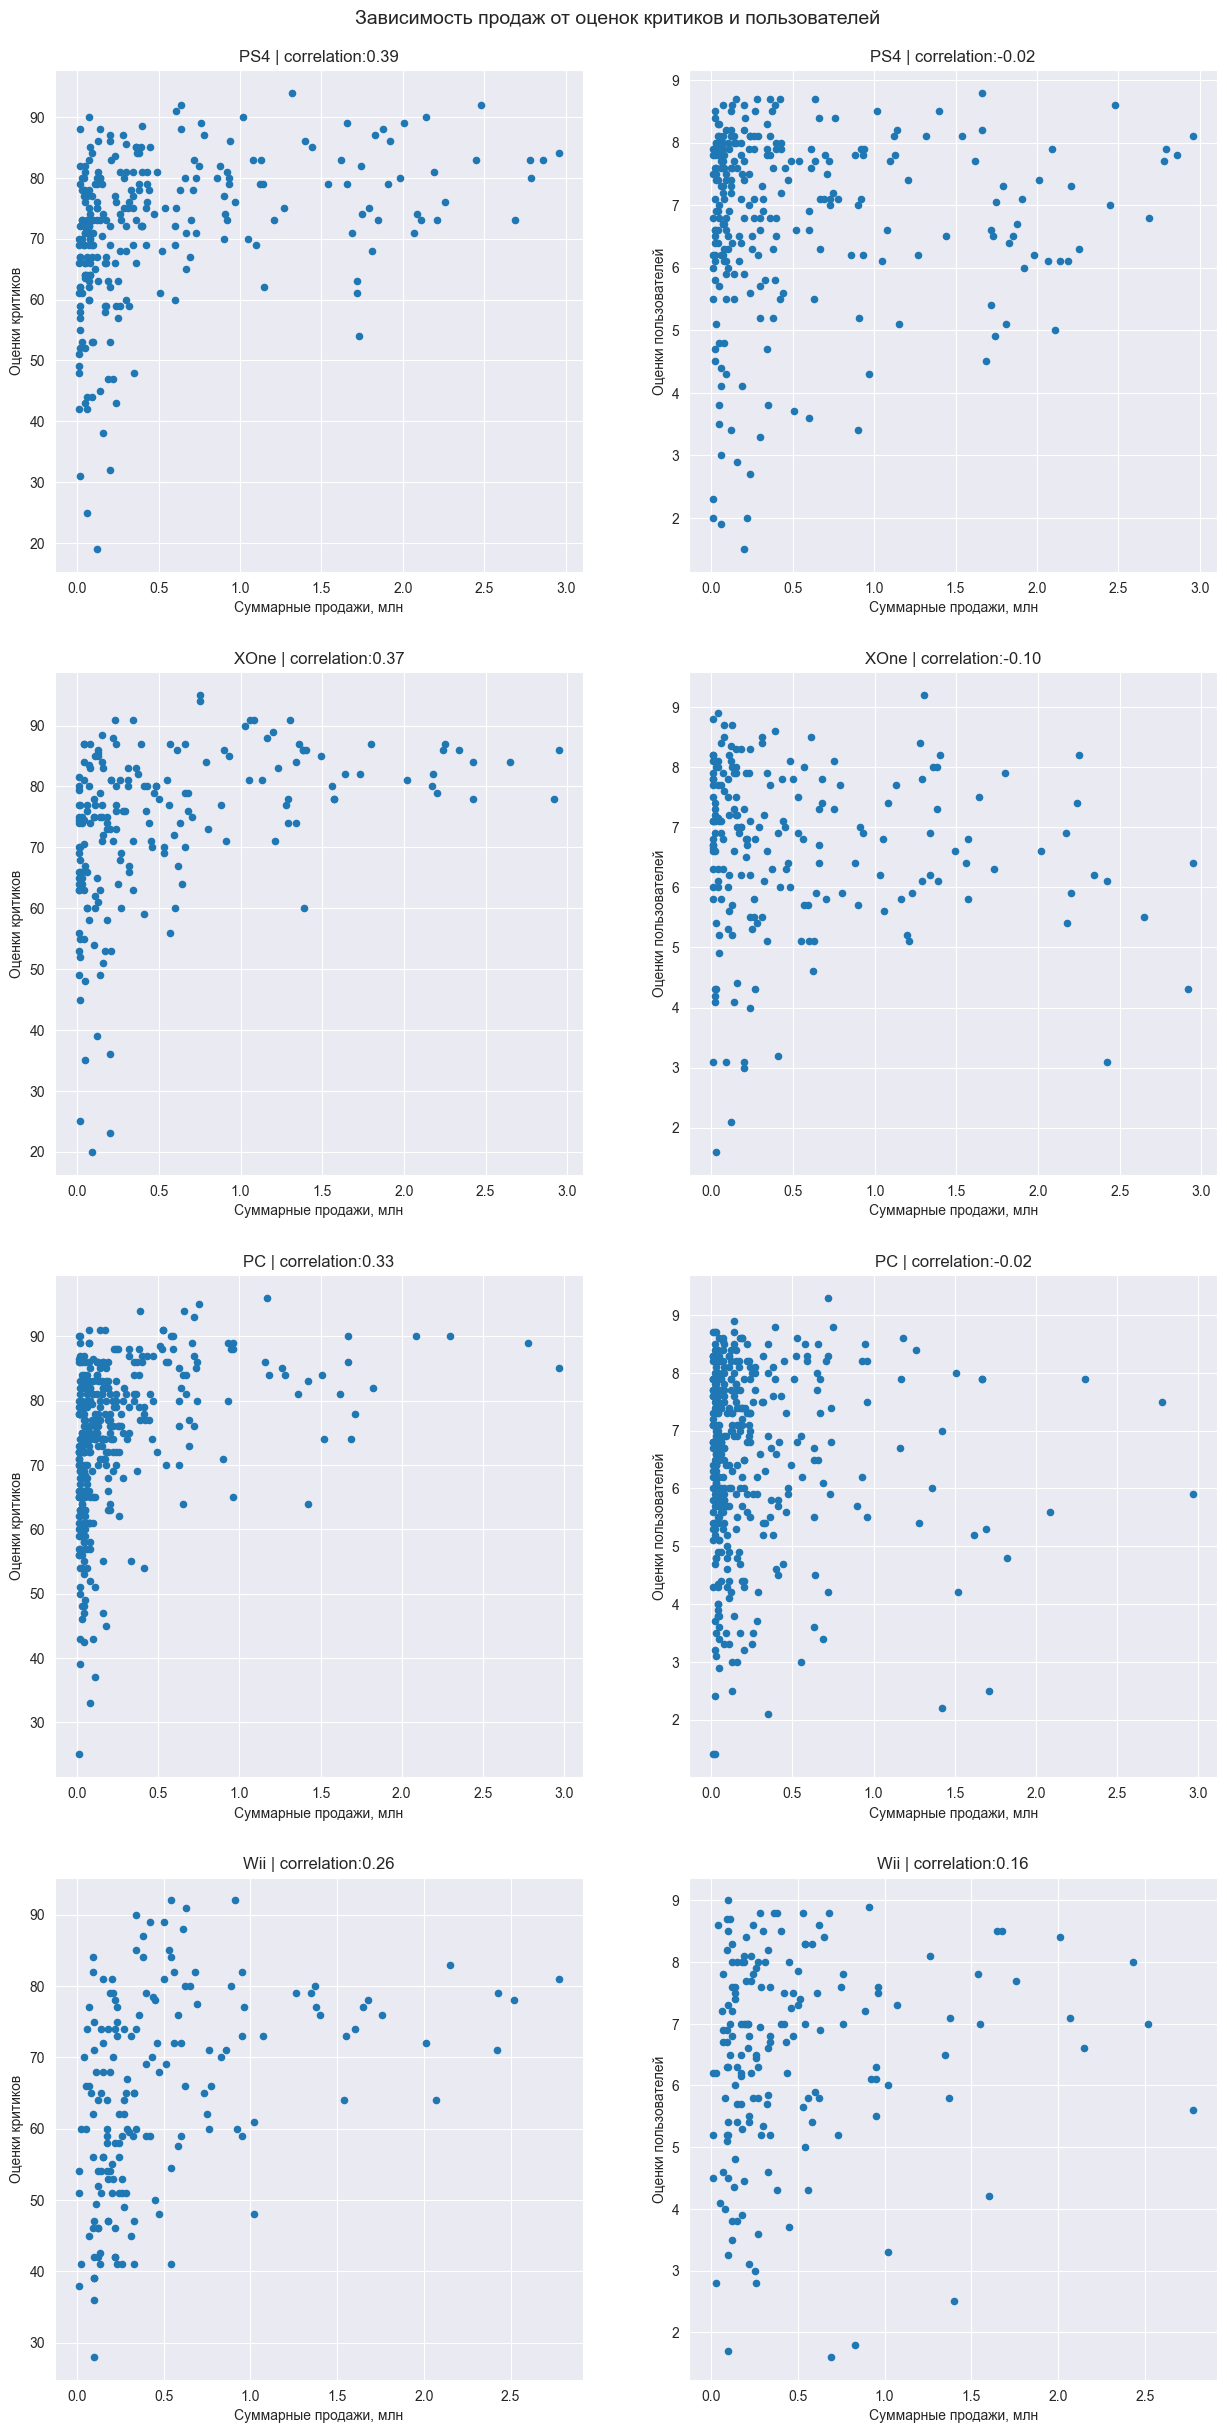

In [22]:
# выберем по одной наиболее поздней платформы от каждой компании и посмотрим как оценки влияют на продажи
platforms = ['PS4', 'XOne', 'PC', 'Wii']

fig, axes = plt.subplots(4, 2, figsize=(15, 30))
fig.suptitle('Зависимость продаж от оценок критиков и пользователей', fontsize=14, y=0.9)

# ограничим часть продаж для выведения графика
limit_sales = 3

for i in range(0, 4):
    for j in range(1, 3):
        if j==1:
            data[(data['platform']==platforms[i])&(data['total_sales']<=limit_sales)].plot(kind='scatter',
                                                                                           y='critic_score',
                                                                                           x='total_sales',
                                                                                           ax=axes[i, j-1])
            # посчитаем корреляцию
            r = data[data['platform']==platforms[i]][['critic_score', 'total_sales']].corr().iloc[0,1]
            
            axes[i, j-1].set_title(f'{platforms[i]} | correlation:{r:.2f}')
            axes[i, j-1].set_ylabel('Оценки критиков')
            axes[i, j-1].set_xlabel('Суммарные продажи, млн')
        else:
            data[(data['platform']==platforms[i])&(data['total_sales']<=limit_sales)].plot(kind='scatter',
                                                                                           y='user_score',
                                                                                           x='total_sales',
                                                                                           ax=axes[i, j-1])
            
            r = data[data['platform']==platforms[i]][['user_score', 'total_sales']].corr().iloc[0,1]
            
            axes[i, j-1].set_title(f'{platforms[i]} | correlation:{r:.2f}')
            axes[i, j-1].set_ylabel('Оценки пользователей')
            axes[i, j-1].set_xlabel('Суммарные продажи, млн')
            
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

На диаграммах рассеяния представлена зависимость между суммарными продажами с оценками пользователей и оценками критиков по наиболее поздним игровым платформам таких компаний как: Sony, Nintendo, Microsoft и отдельно выделим PC. Заметим, что корреляция на графиках зависимости суммарных продаж с оценками критиков выше, чем с оценками пользователей. Можем предположить, что критики точнее предсказывают успешность продаж игр, чем пользователи.

#### `genre`  — жанр игры

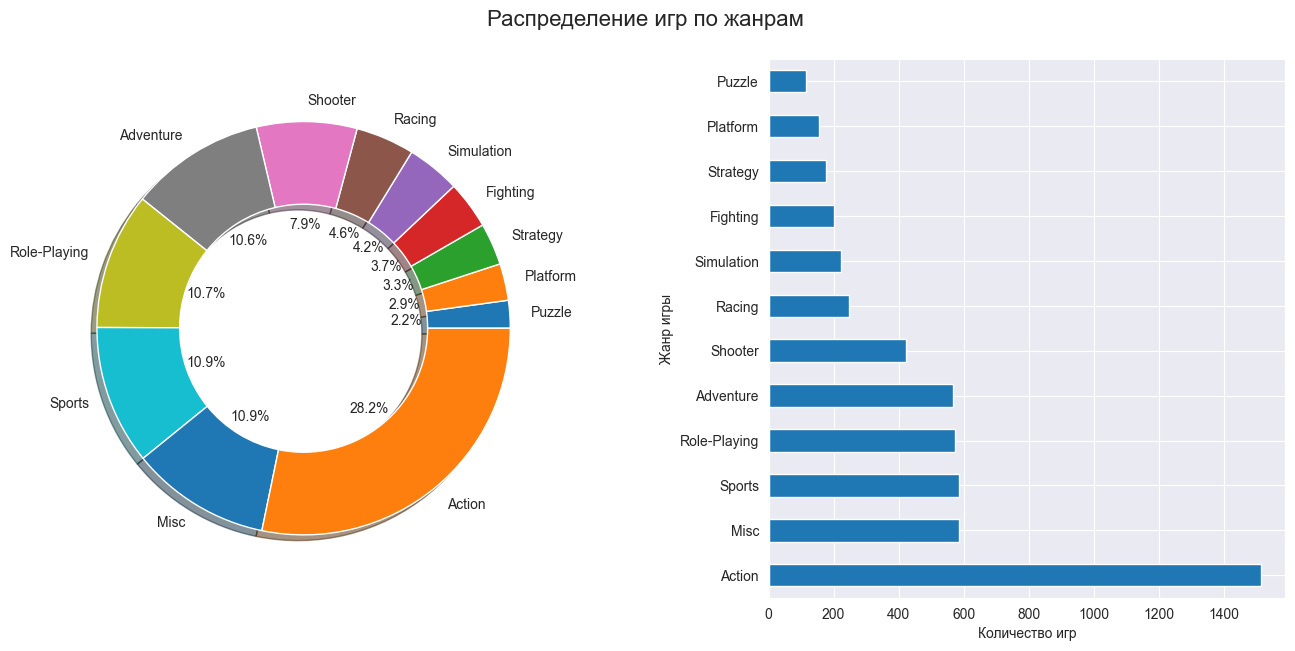

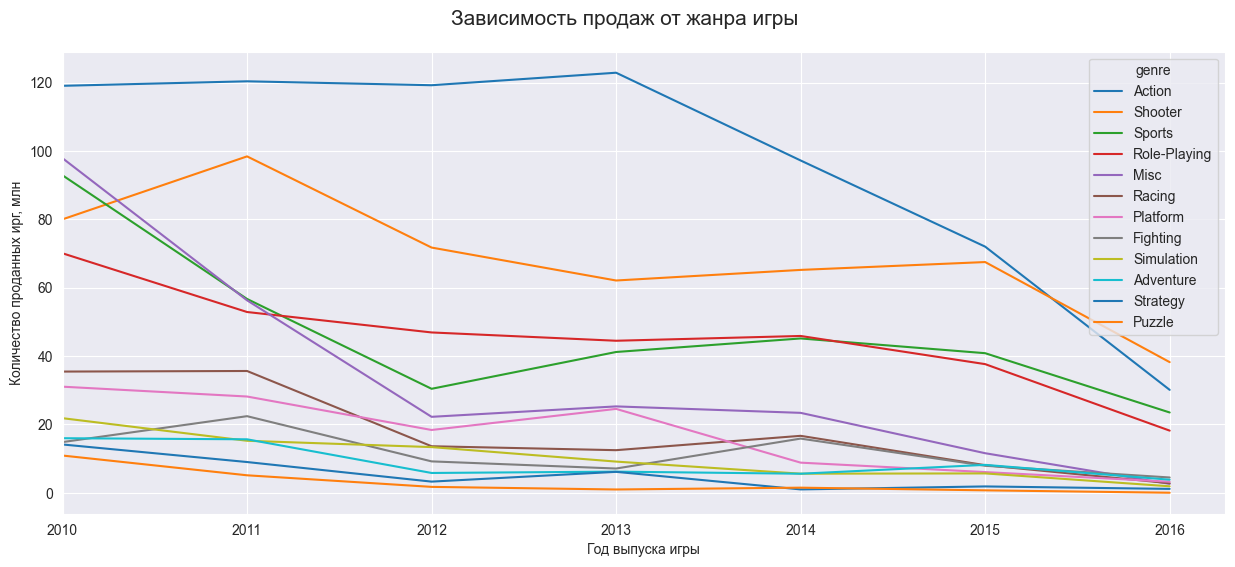

In [23]:
# построим распределение игр по жанрам
fig, axes = plt.subplots(1, 2, figsize=(16,7))
data.pivot_table(index='genre',
                 values='name',
                 aggfunc='count').sort_values('name').plot(kind='pie',
                                                           y='name',
                                                           ax=axes[0],
                                                           legend=False,
                                                           autopct='%1.1f%%',
                                                           shadow=True,
                                                           wedgeprops=dict(width=0.4),
                                                           pctdistance=.5)
data.pivot_table(index='genre',
                 values='name',
                 aggfunc='count').sort_values('name', ascending=False).plot(kind='barh', ax=axes[1])

fig.suptitle('Распределение игр по жанрам', fontsize=16, y=0.95)

axes[0].set_ylabel('')
axes[1].set_ylabel('Жанр игры')

axes[1].set_xlabel('Количество игр')
axes[1].legend().remove()

plt.subplots_adjust(wspace=0.4)
plt.show()

# определим порядок самых прибыльных игр
cols = data.pivot_table(index=['genre'],
                 values='total_sales',
                 aggfunc='sum').sort_values('total_sales', ascending=False).index

fig, axes = plt.subplots(1, figsize=(15, 6))
data.pivot_table(index=['year_of_release'],
                 columns=['genre'],
                 values='total_sales',
                 aggfunc='sum').reset_index().plot(x='year_of_release', y=cols, ax=axes)

fig.suptitle('Зависимость продаж от жанра игры', fontsize=15, y=0.95)
axes.set_ylabel('Количество проданных ирг, млн')
axes.set_xlabel('Год выпуска игры')
axes.set_xlim(2010, )

plt.show()

Самым распространенным игровым жанром является Экшен (28.2% всего рынка с 2010 года), затем с равной долей по 11% идут жанры: Misc, Sports, Role-Playing, Adventure. Однако топ 5 самых прибыльных игр немного отличается от общего распределения игр. В него входят следующие жанры: Action, Shooter, Sports, Role-Playing, Misc. Обратим внимание, что жанр Adventure обладает достаточно большой долей рынка, но продажи занимают только 10 место из наиболее популярных жанров игр в 2010-2016 годах.

### Портрет пользователя каждого региона

В данном разделе посмотрим в каких регионах наиболее популярными являются определенные игровые платформы, как влиется рейтинг ESRB на продажи и какие жанры предпочитают пользователи в том или ином регионе.

#### `platform` — платформа

In [24]:
# создадим вспомогательные для графиков словари
regions = {'NA': 'na_sales',
           'EU': 'eu_sales',
           'JP': 'jp_sales',
           'OTHER': 'other_sales'}

platform_colors = {'X360': 'tab:blue',
                  'PS3': 'tab:orange',
                  'DS': 'tab:green',
                  'PS4': 'tab:red',
                  '3DS': 'tab:purple',
                  'Wii': 'tab:brown',
                  'XOne': 'tab:gray',
                  'WiiU': 'tab:olive',
                  'PC': 'tab:cyan',
                  'PSP': 'tab:pink',
                  'PSV': 'oldlace',
                  'PS2': 'avender'}

genre_colors = {'Misc': 'tab:blue',
                'Action': 'tab:orange',
                'Role-Playing': 'tab:green',
                'Shooter': 'tab:red',
                'Racing': 'tab:purple',
                'Platform': 'tab:brown',
                'Simulation': 'tab:gray',
                'Sports': 'tab:olive',
                'Fighting': 'tab:cyan',
                'Strategy': 'tab:pink',
                'Adventure': 'oldlace',
                'Puzzle': 'avender'}

ersb_colors = {'Для всех': 'tab:blue',
               'Для взрослых': 'tab:orange',
               'Для всех от 10 лет': 'tab:red',
               'Подросткам': 'tab:purple',
               'Для детей младшего возраста': 'tab:gray',
               'Рейтинг ожидается': 'oldlace'}

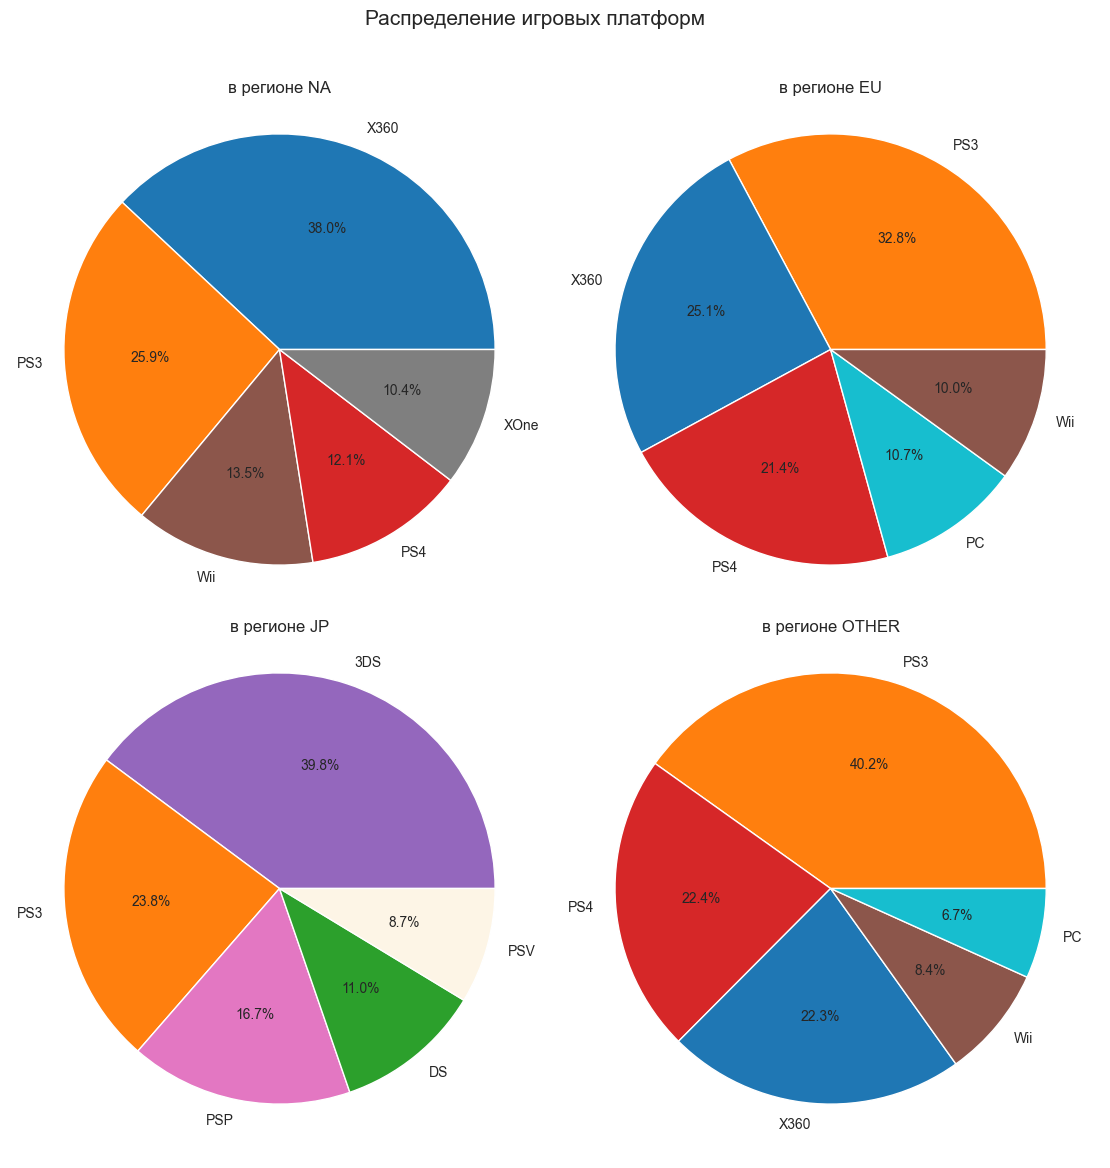

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for i, region in enumerate(regions):
        row, col = int(i/2), int(i%2)

        # определим top5 популярных платформ в регионе
        top5 = data.pivot_table(index='platform',
                                values=regions[region],
                                aggfunc='sum').sort_values(regions[region],
                                                           ascending=False).index[:5].tolist()
        
        # построим доли продаж по регионам по топ5 платформам
        data.pivot_table(index='platform',
                         values=regions[region],
                         aggfunc='sum').loc[top5].plot(kind='pie', y=regions[region], ax=axes[row, col],
                                                       colors=[platform_colors[i] for i in top5],
                                                       legend=False,
                                                       autopct='%1.1f%%')
        
        
        axes[row, col].set_title(f'в регионе {region}', y=0.96)
        axes[row, col].set_ylabel('')

fig.suptitle('Распределение игровых платформ', fontsize=15, y=0.93)
plt.subplots_adjust(hspace=0, wspace=-0.2)
plt.show()

На данных круговых диаграмах показано, на каких платформах чаще играют в тех или иных регионах. В Северной Америке наиболее популярными платформами для игр являются X360 и PS3, которые составляют более 60% от общего числа игровых платформ, которые вошли в топ5.

В Европе видим примерно то же соотношение PS3 и X360, но выделяется платформа 'PC', которая не попала в топ в Северной Америке и Японии. В данном же регионе данная платформа занимает долю около 10% среди 5 наиболее популярных игровых платформ в Европе.

В Японии больше всего игр было продано для 3DS от японской компании Nintendo и PS3 от японской компании Sony. И в принципе все платформы, которые входят в топ 5 наиболее популярных в Японии были там же и созданы. Японцы поддерживают отечественного производителя!

В остальном мире бОльшую часть занимают платформы PS3, PS4 и явно меньше X360 от Американской компании Microsoft.

#### `genre` — жанр игры

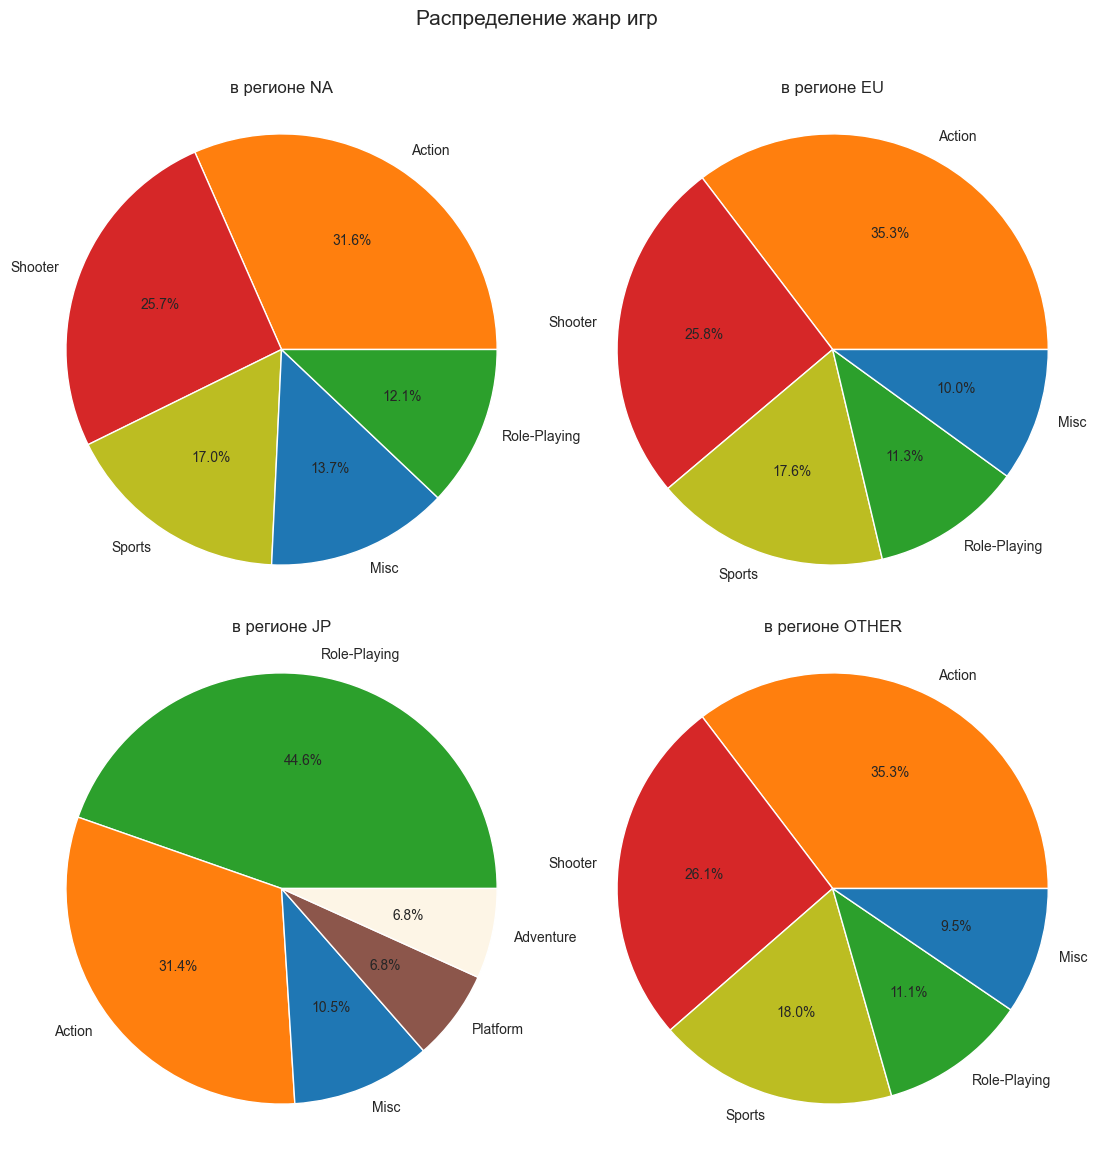

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for i, region in enumerate(regions):
        row, col = int(i/2), int(i%2)

        # определим top5 популярных жанров в регионе
        top5 = data.pivot_table(index='genre',
                                values=regions[region],
                                aggfunc='sum').sort_values(regions[region],
                                                           ascending=False).index[:5].tolist()
        
        # построим доли продаж по регионам по топ5 жанрам
        data.pivot_table(index='genre',
                         values=regions[region],
                         aggfunc='sum').loc[top5].plot(kind='pie', y=regions[region], ax=axes[row, col],
                                                       colors=[genre_colors[i] for i in top5],
                                                       legend=False,
                                                       autopct='%1.1f%%')
        
        
        axes[row, col].set_title(f'в регионе {region}', y=0.96)
        axes[row, col].set_ylabel('')

fig.suptitle('Распределение жанр игр', fontsize=15, y=0.93)
plt.subplots_adjust(hspace=0, wspace=-0.2)
plt.show()

На данных круговых диаграмах изображено распределение игровых жанров по регионам. Во всех регионах за исключением Японии видим абсолютно одинаковое соотношение игровых жанров среди 5 наиболее самых популярных в данном регионе: 
1. Action (31.6-35.3%)
2. Shooter (25.7-26.1%)
3. Sports (17-18%)
4. Role-Playing (11.1-12.1%) / Misc (9.5-13.7%)

В Японии такой жанр игр как Shooter отсутствует в топ5, а первое место занимает жанр Role-Playing. Можем предположить, что в Японии есть свой особенный игровой менталитет, который отличается от всего остального мира.

#### `Rating` — рейтинг от организации ESRB

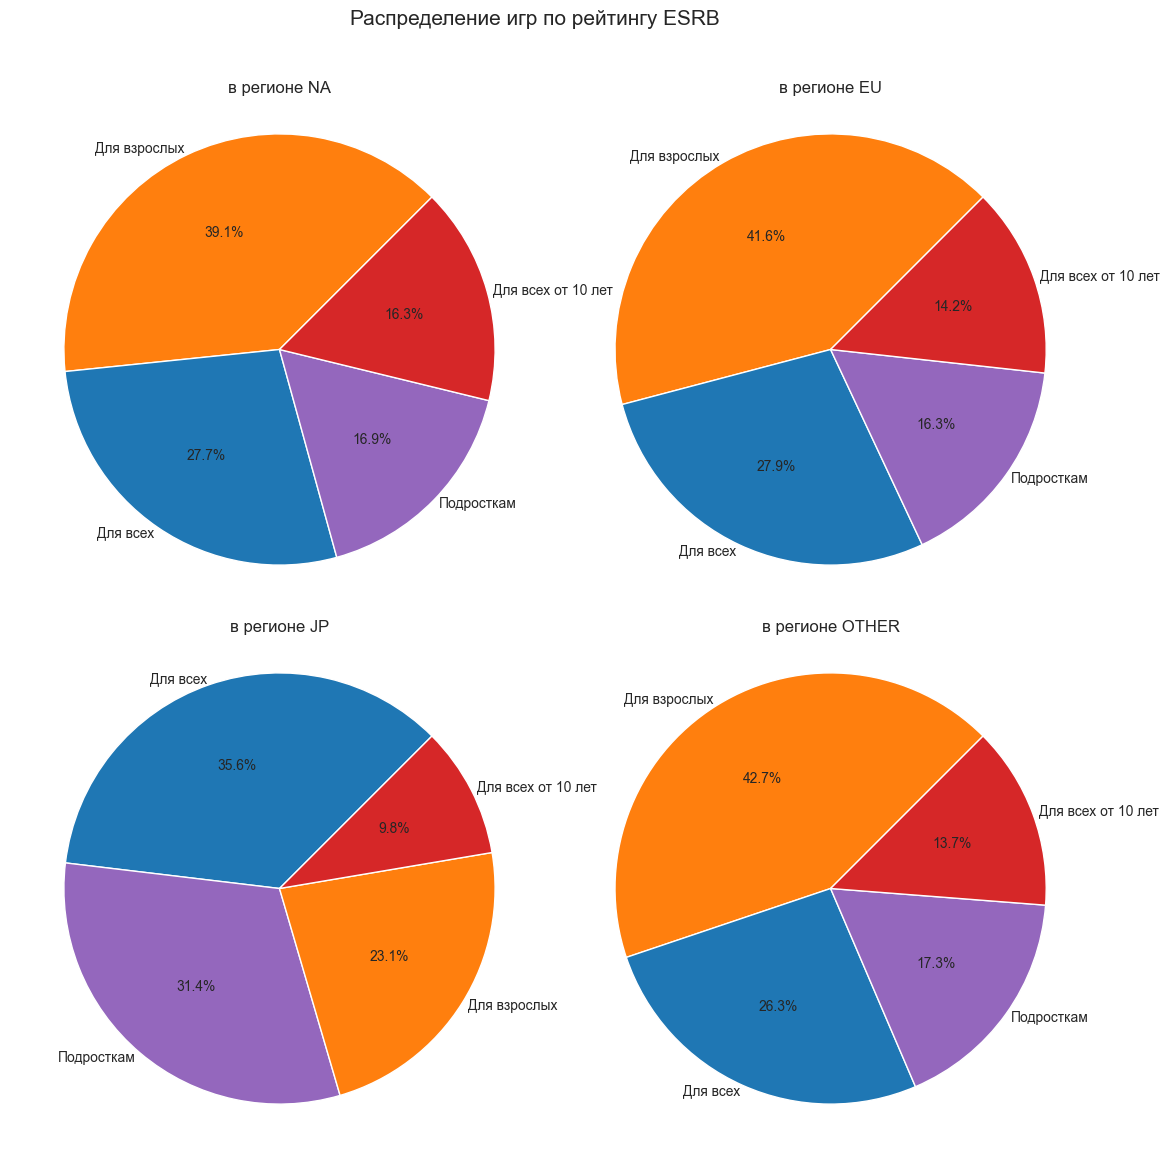

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for i, region in enumerate(regions):
        row, col = int(i/2), int(i%2)
        
        
        ersb_top = data.pivot_table(index='rating_info',
                                values=regions[region],
                                aggfunc='sum').sort_values(regions[region],
                                                           ascending=False).index.tolist()[:4]
        
        # построим доли продаж по регионам по топ5 жанрам
        data.pivot_table(index='rating_info',
                         values=regions[region],
                         aggfunc='sum').loc[ersb_top].plot(kind='pie', y=regions[region], ax=axes[row, col],
                                                           colors=[ersb_colors[i] for i in ersb_top],
                                                           legend=False,
                                                           autopct='%1.1f%%',
                                                           startangle=45,
                                                           labeldistance=1.03)
        
        
        axes[row, col].set_title(f'в регионе {region}', y=0.96)
        axes[row, col].set_ylabel('')

fig.suptitle('Распределение игр по рейтингу ESRB', fontsize=15, y=0.93)
plt.subplots_adjust(hspace=0, wspace=-0.2)
plt.show()

Представленные круговые диаграммы показывают распределение игр с различным рейтингом ESRB по регионам. Видим похожее соотношение, как и с диаграммами по жанру между регионами - снова выбивается Япония. Во всем мире наиболее распространенный рейтинг игр - это "Игры для взрослых", затем идут игры с рейтингом "Для всех". 

В Японии же на первом месте "Игры для всех", а затем "Игры для подростков". В Японии не популярны игры, в которых есть насилие, большое количество крови, ненормативная лексика и т.д.